### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

# Import necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the dataset

In [39]:
df = pd.read_csv('footfalls.csv')

# View the data and perform statistical analysis

In [40]:
df.sample(5)

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
83,Dec-97,1797,84,7.493874,7056,0,0,0,0,0,0,0,0,0,0,0,1
110,Mar-00,1920,111,7.560080,12321,0,0,1,0,0,0,0,0,0,0,0,0
115,Aug-00,2097,116,7.648263,13456,0,0,0,0,0,0,0,1,0,0,0,0
56,Sep-95,1571,57,7.359468,3249,0,0,0,0,0,0,0,0,1,0,0,0
50,Mar-95,1798,51,7.494430,2601,0,0,1,0,0,0,0,0,0,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

# Convert the 'Month' column to datetime format

In [42]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Month          159 non-null    datetime64[ns]
 1   Footfalls      159 non-null    int64         
 2   t              159 non-null    int64         
 3   log_footfalls  159 non-null    float64       
 4   t_square       159 non-null    int64         
 5   Jan            159 non-null    int64         
 6   Feb            159 non-null    int64         
 7   Mar            159 non-null    int64         
 8   Apr            159 non-null    int64         
 9   May            159 non-null    int64         
 10  Jun            159 non-null    int64         
 11  Jul            159 non-null    int64         
 12  Aug            159 non-null    int64         
 13  Sep            159 non-null    int64         
 14  Oct            159 non-null    int64         
 15  Nov            159 non-

In [43]:
df.describe()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1997-07-31 23:14:43.018867968,1822.226415,80.000000,7.502746,8506.666667,0.088050,0.088050,0.088050,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761
min,1991-01-01 00:00:00,1361.000000,1.000000,7.215975,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994-04-16 00:00:00,1698.500000,40.500000,7.437500,1640.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997-08-01 00:00:00,1831.000000,80.000000,7.512618,6400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000-11-16 00:00:00,1967.000000,119.500000,7.584265,14280.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2004-03-01 00:00:00,2223.000000,159.000000,7.706613,25281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,181.601732,46.043458,0.101775,7605.556039,0.284263,0.284263,0.284263,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866


# Set the Month column as the index


In [44]:
df.set_index('Month', inplace=True)
df.index.freq = 'MS'

# Plot the original data

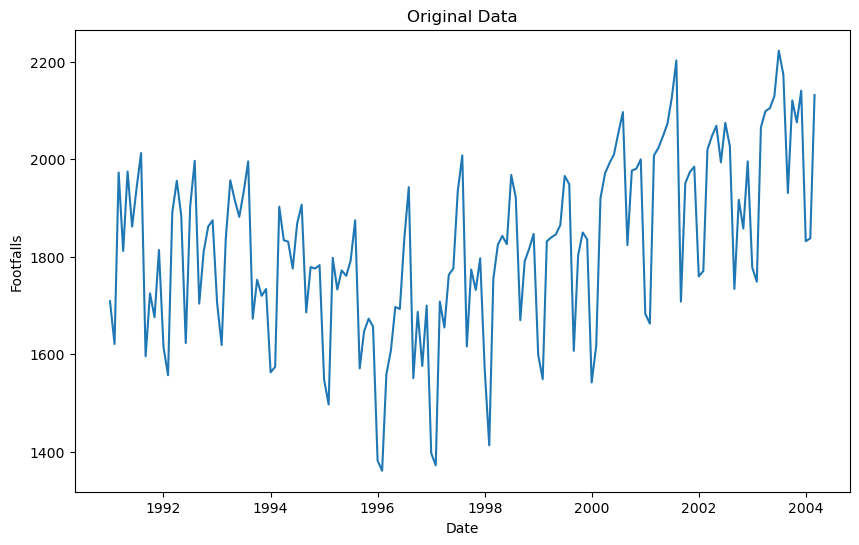

In [45]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Footfalls'])
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Footfalls')
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test

In [46]:
result = adfuller(df['Footfalls'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')

for key, value in result[4].items():
    print(key, value)

ADF Statistic: -0.23499112877866932
p-value: 0.9342202042969283
Critical Values:
1% -3.476597917537401
5% -2.8818291230495543
10% -2.5775887982253085


# Decision criteria

In [47]:
if result[1] < 0.05:
    print("Decision: The series is stationary.")
else:
    print("Decision: The series is non-stationary.")


Decision: The series is non-stationary.



# Combine log transformation and differencing to achieve stationarity


In [48]:
df_stationary = df['log_footfalls'].diff().dropna()

# Perform the ADF test again to confirm stationarity

In [49]:
result = adfuller(df_stationary)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

ADF Statistic: -3.3251504540219967
p-value: 0.013791002894967519
Critical Values:
1% -3.476597917537401
5% -2.8818291230495543
10% -2.5775887982253085


# Decision criteria


In [50]:
if result[1] < 0.05:
    print("Decision: The series is stationary.")
else:
    print("Decision: The series is non-stationary.")


Decision: The series is stationary.


# Perform Seasonal decomposition


In [51]:
decomposition = seasonal_decompose(df_stationary, model='additive')

# Plot the decomposition

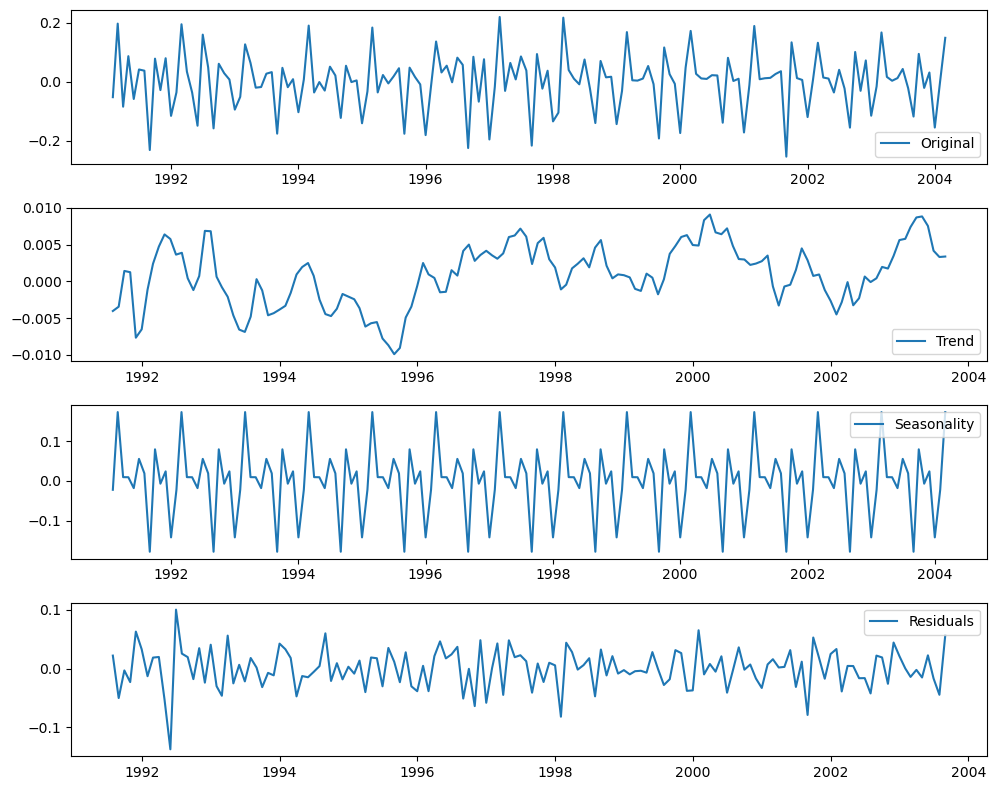

In [52]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(df_stationary.index, df_stationary, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df_stationary.index, trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df_stationary.index, seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df_stationary.index, residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Calculate rolling mean and standard deviation

In [53]:
rolling_mean_trend = trend.rolling(window=10).mean()
rolling_std_trend = trend.rolling(window=10).std()

rolling_mean_seasonal = seasonal.rolling(window=10).mean()
rolling_std_seasonal = seasonal.rolling(window=10).std()

print("Rolling Mean of Trend:")
print(rolling_mean_trend)
print("\nRolling Standard Deviation of Trend:")
print(rolling_std_trend)
print("\nRolling Mean of Seasonality:")
print(rolling_mean_seasonal)
print("\nRolling Standard Deviation of Seasonality:")
print(rolling_std_seasonal)

Rolling Mean of Trend:
Month
1991-02-01   NaN
1991-03-01   NaN
1991-04-01   NaN
1991-05-01   NaN
1991-06-01   NaN
              ..
2003-11-01   NaN
2003-12-01   NaN
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
Freq: MS, Name: trend, Length: 158, dtype: float64

Rolling Standard Deviation of Trend:
Month
1991-02-01   NaN
1991-03-01   NaN
1991-04-01   NaN
1991-05-01   NaN
1991-06-01   NaN
              ..
2003-11-01   NaN
2003-12-01   NaN
2004-01-01   NaN
2004-02-01   NaN
2004-03-01   NaN
Freq: MS, Name: trend, Length: 158, dtype: float64

Rolling Mean of Seasonality:
Month
1991-02-01         NaN
1991-03-01         NaN
1991-04-01         NaN
1991-05-01         NaN
1991-06-01         NaN
                ...   
2003-11-01    0.011856
2003-12-01    0.016499
2004-01-01   -0.015068
2004-02-01   -0.018254
2004-03-01   -0.001839
Freq: MS, Name: seasonal, Length: 158, dtype: float64

Rolling Standard Deviation of Seasonality:
Month
1991-02-01         NaN
1991-03-01         NaN
1991-04-01  

# Plot the Rolling Mean and Stander Deviation

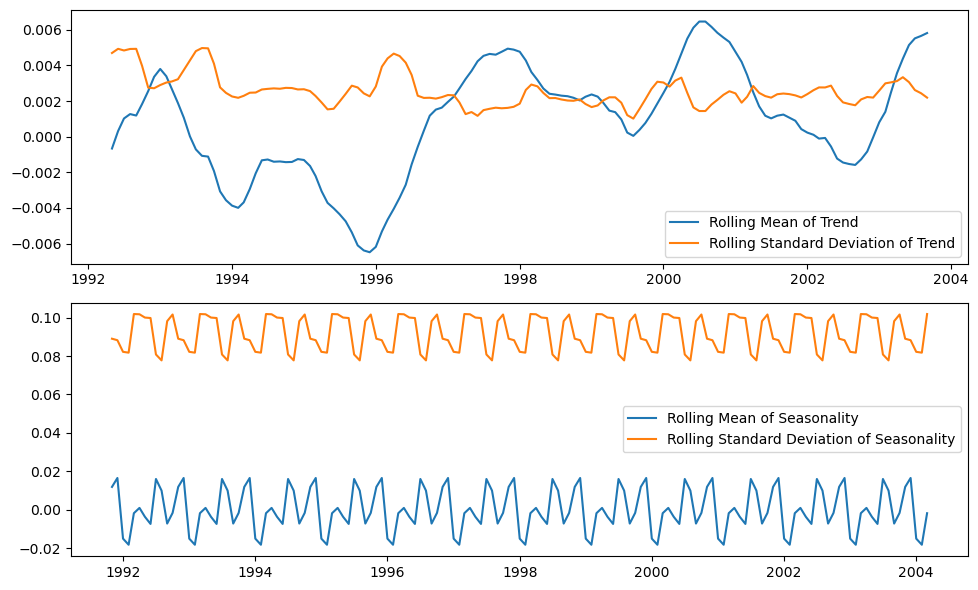

In [54]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.plot(df_stationary.index, rolling_mean_trend, label='Rolling Mean of Trend')
plt.plot(df_stationary.index, rolling_std_trend, label='Rolling Standard Deviation of Trend')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(df_stationary.index, rolling_mean_seasonal, label='Rolling Mean of Seasonality')
plt.plot(df_stationary.index, rolling_std_seasonal, label='Rolling Standard Deviation of Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# Split the data into training and testing sets

In [70]:
train, test = train_test_split(df_stationary.values, test_size=0.3, random_state=42,shuffle=False)

# Build a SARIMA model

In [72]:
model = SARIMAX(train_df, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

# Print the summary of the model


In [73]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  110
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 169.919
Date:                            Thu, 23 Jan 2025   AIC                           -329.838
Time:                                    23:59:47   BIC                           -316.964
Sample:                                02-01-1991   HQIC                          -324.632
                                     - 03-01-2000                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3190      0.081     -3.942      0.000      -0.478      -0.160
ma.L1         -0.9900      0.557   

# Define a scoring function


In [74]:
def score_model(model_fit):
    score = 0
    
    if model_fit.aic < 1000:
        score += 1
    
    if model_fit.bic < 1000:
        score += 1
    
    if model_fit.llf > 0: #(score of log-likelihood)
        score += 1
    
    return score


# Score the model


In [75]:
score = score_model(model_fit)
print('Model Score:', score)

Model Score: 3


# Predicted values

In [76]:
predicted_values = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Plot the actual and predicted values

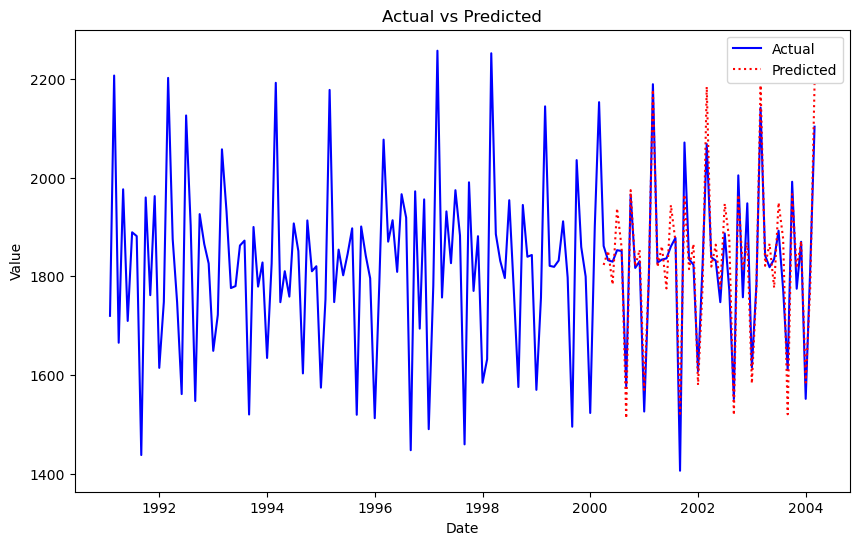

In [89]:
plt.figure(figsize=(10,6))
plt.plot(df_stationary.index, np.exp(df_stationary + df['log_footfalls'].mean()), label='Actual', color='b')
plt.plot(df_stationary.index[-len(predicted_values):], np.exp(predicted_values + df['log_footfalls'].mean()), label='Predicted',linestyle=':', color='r')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Get the forecast for the next 10 footfalls

In [78]:
forecast = model_fit.get_forecast(steps=10)

# Create a date range for the forecast period



In [90]:
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=10, freq='MS')

# Plot the forecasted values with confidence intervals

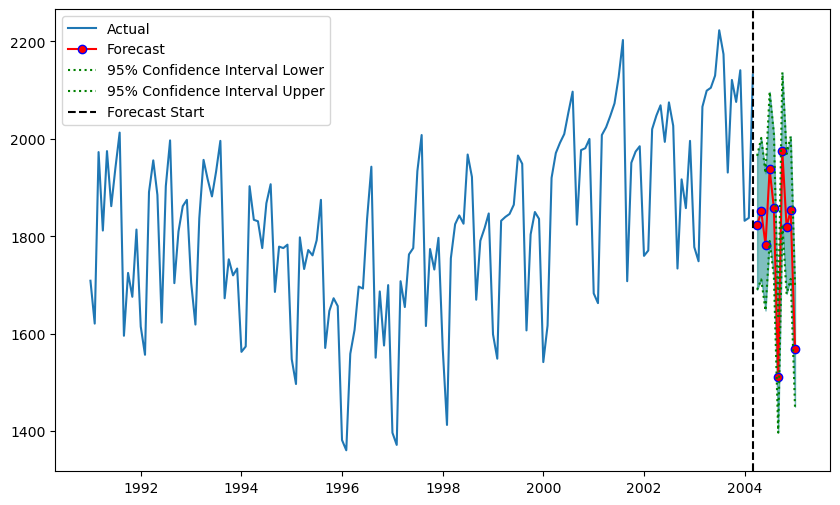

In [94]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Footfalls'], label='Actual')
plt.plot(forecast_index, np.exp(forecast.predicted_mean + df['log_footfalls'].mean()), label='Forecast', marker='o', markerfacecolor='red', markeredgecolor='b',color='r')
plt.plot(forecast_index, np.exp(forecast.predicted_mean - 1.96 * forecast.se_mean + df['log_footfalls'].mean()), label='95% Confidence Interval Lower', linestyle=':', color='g')
plt.plot(forecast_index, np.exp(forecast.predicted_mean + 1.96 * forecast.se_mean + df['log_footfalls'].mean()), label='95% Confidence Interval Upper', linestyle=':', color='g')
plt.fill_between(forecast_index,
np.exp(forecast.predicted_mean - 1.96 * forecast.se_mean + df['log_footfalls'].mean()),
np.exp(forecast.predicted_mean + 1.96 * forecast.se_mean + df['log_footfalls'].mean()),
color='Teal', alpha=0.5)
plt.axvline(x=df.index[-1], color='black', linestyle='--', label='Forecast Start')
plt.legend()
plt.show()

# Create a pandas Dataframe with the forecasted values and the corresponding dates


In [95]:
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Footfalls': np.exp(forecast.predicted_mean + df['log_footfalls'].mean())
})


forecast_df.reset_index(drop=True, inplace=True)
forecast_df.index += 1

print(forecast_df)

         Date    Footfalls
1  2004-04-01  1822.763873
2  2004-05-01  1851.211778
3  2004-06-01  1783.114997
4  2004-07-01  1937.511670
5  2004-08-01  1857.436991
6  2004-09-01  1512.073519
7  2004-10-01  1974.401552
8  2004-11-01  1819.961542
9  2004-12-01  1853.378621
10 2005-01-01  1569.459008


# Calculate metrics


In [96]:
# Actual values
actual = test

# Predicted values
predicted = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

# Calculate MAE
mae = np.mean(np.abs(actual - predicted))
print("MAE:", mae)

# Calculate MSE
mse = np.mean((actual - predicted)**2)
print("MSE:", mse)

# Calculate RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calculate R-squared
r2 = 1 - (np.sum((actual - predicted)**2) / np.sum((actual - np.mean(actual))**2))
print("R-squared:", r2)



MAE: 0.024742563342610657
MSE: 0.000921448942385852
RMSE: 0.030355377487124947
R-squared: 0.880067512732396
